In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Preprocesamiento Básico

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [3]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

En una sola figura grafique el histograma de la edad, el histograma de la edad centrado en una media de 0 y desviación estándar de 1, y el histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1.

In [4]:
age = df["Age"]
# Centrado y Escalado
scaled_age = (age - age.mean()) / age.var() ** (1 / 2)
bounded_age = (age - age.min()) / (age.max() - age.min())

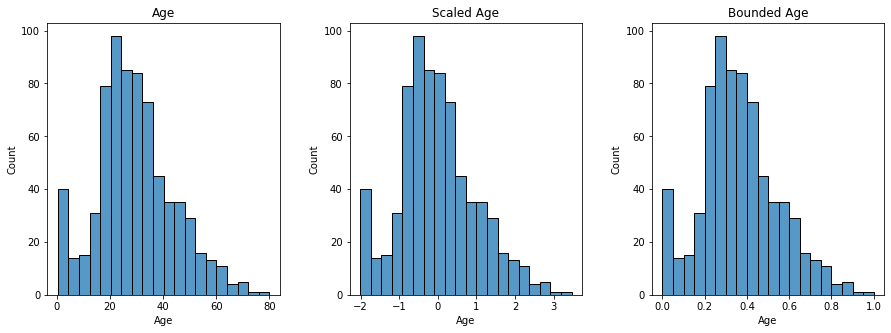

In [5]:
_fig_, _axs_ = plt.subplots(ncols = 3, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.1, wspace = 0.3)

# Graficación Edad Normal
_axs_[0].set(title = "Age")
_ = sns.histplot(x = age, ax=_axs_[0])

# Graficación Escalado
_axs_[1].set(title = "Scaled Age")
_ = sns.histplot(x = scaled_age, ax=_axs_[1])

# Graficación Escalado Acotado
_axs_[2].set(title = "Bounded Age")
_ = sns.histplot(x = bounded_age, ax=_axs_[2])

## Asignación 2 &#x1F625;

Calcule e imprima el skewness de la tarifa. Grafique su histograma. Aplique la función de su preferencia para remover el skewness, calcule e imprima el valor del skewness para la función transformada y grafique su histograma.

In [6]:
def calc_skewness(x) -> float:
    """
    Descripción:
    Esta funcion calcula el skewness de un atributo.
    
    Entradas:
    - x: Los samples de un atributo dado. 
            
    Salidas:
    - El cálculo de skewness.
    """
    return (((x-x.mean()) / x.var()**(1/2)) ** 3).mean()

In [7]:
fare = df.Fare
skewness = calc_skewness(fare)
print("Skewness Fare:", skewness)

Skewness Fare: 4.771209669373592


In [8]:
# Eliminamos los registros vacíos 
fare_array = np.array(fare.fillna(fare.mean()))
# Eliminamos los valores 0
fare_array[fare_array == 0] = 0.001
# Realizamos las funciones de remplazo
fare_function = fare_array ** (1/2)
improved_skewneess = calc_skewness(fare_function)
print("Skewness Fare Mejorado:", improved_skewneess)

Skewness Fare Mejorado: 2.084269758721428


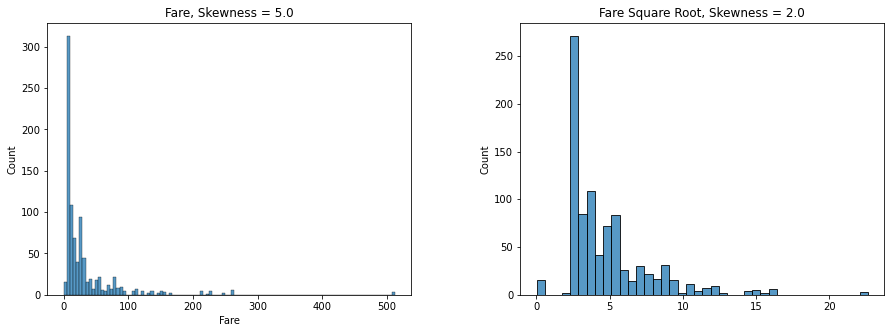

In [9]:
_fig_, _axs_ = plt.subplots(ncols = 2, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.1, wspace = 0.3)
# Graficación Fare
_axs_[0].set(title = "Fare, Skewness = {}".format(round(skewness, 0)))
_ = sns.histplot(x = fare, ax=_axs_[0])

# Graficación Fare Square Root
_axs_[1].set(title = "Fare Square Root, Skewness = {}".format(round(improved_skewneess, 0)))
_ = sns.histplot(x = fare_function, ax=_axs_[1])

## Asignación 3 &#x1F921;

Convierta la características __Sex__ y __Embarked__ a su versión de One hot encoding y agreguelas al dataframe original.

In [10]:
# Obtenemos One Hot Encoding de Sex
ohe_sex = pd.get_dummies(df['Sex'], prefix = 'Sex')
# Obtenemos One Hot Encoding de Embarked
ohe_embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked')
# Sustituimos columna Sex por ohe_sex
df = df.drop('Sex', axis = 1)
df = df.join(ohe_sex)
# Sustituimos columna Embarked por ohe_embarked
df = df.drop('Embarked', axis = 1)
df = df.join(ohe_embarked)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


## Asignación 4 &#x1F643;

Implemente PCA dentro de una función (usted debe definirla) y apliquela para gráficar en un scatterplot de dos dimensiones los datos. (No incluya las características __Name__, __Ticket__ y __Cabin__).